# Práctica sobre redes bayesianas.
- Mara Pareja del Pino
- Susana Suárez Mendoza

### Datos del dataset:
- **Radio:** (metros) - variable real
- **Masa:** (kilogramos) - variable real
- **Gravedad:** (relativa respecto a la terrestre) - variable real
- **Atmósfera:** variable binaria
- **Oxígeno:** variable binaria
- **Temperatura promedio:** (grados centígrados) - variable real
- **Existencia de agua:** variables binaria
- **Periodo de rotación:** (horas) - variable real
- **Vida:** variable binaria

### Enunciado de la práctica.
Deberás desarrollar una red bayesiana que retorne la probabilidad de que haya vida en un determinado planeta en función de sus propiedades.

In [17]:
import bnlearn as bn
import pandas as pd

### 1. Categoriza las variables reales como consideres.

In [18]:
df = pd.read_excel('exoplanets.xls')

A la hora de realizar una red bayesiana es necesario discretizar las variables reales. En nuestro caso hemos discretizado las siguientes variables: radio, masa, gravedad, temperatura media y periodo rotacional.

Para llevar a cabo lo anterior hemos optado por utilizar los quantiles de los datos de cada variable, ya que estos nos permiten la división equitativa de los datos de cada variable. Las etiquetas asignadas a los valores de las columnas han sido, según el rango intercuartílico, las siguientes: "S" (Small), "M" (Medium) y "B" (Big).

In [19]:
rango_r = df['radius (m)'].quantile([0.33, 0.66])
rango_m = df['mass (kg)'].quantile([0.33, 0.66])
rango_g = df['gravity'].quantile([0.33, 0.66])
rango_av = df['avg_temp (C)'].quantile([0.33, 0.66])
rango_rot = df['rotational_period (h)'].quantile([0.33, 0.66])

In [20]:
bins = [0, rango_r[0.33], rango_r[0.66], max(df['radius (m)'])]
df['radius (m)'] = pd.cut(x = df['radius (m)'], bins = bins, labels = ['S', 'M', 'B'])

bins = [0, rango_m[0.33], rango_m[0.66], max(df['mass (kg)'])]
df['mass (kg)'] = pd.cut(x = df['mass (kg)'], bins = bins, labels = ['S', 'M', 'B'])

bins = [0, rango_g[0.33], rango_g[0.66], max(df['gravity'])]
df['gravity'] = pd.cut(x = df['gravity'], bins = bins, labels = ['S', 'M', 'B'])

bins = [0, rango_av[0.33], rango_av[0.66], max(df['avg_temp (C)'])]
df['avg_temp (C)'] = pd.cut(x = df['avg_temp (C)'], bins = bins, labels = ['S', 'M', 'B'])

bins = [0, rango_rot[0.33], rango_rot[0.66], max(df['rotational_period (h)'])]
df['rotational_period (h)'] = pd.cut(x = df['rotational_period (h)'], bins = bins, labels = ['S', 'M', 'B'])

El dataframe resultante tras la discretización necesaria para el desarrollo de la red bayesiana es el siguiente:

In [21]:
df

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,B,B,B,YES,YES,S,YES,B,NO
1,B,B,B,NO,NO,S,NO,M,NO
2,B,B,B,YES,YES,M,YES,S,YES
3,B,B,B,YES,YES,M,NO,S,NO
4,S,S,S,NO,NO,S,NO,M,NO
...,...,...,...,...,...,...,...,...,...
9995,B,B,B,NO,NO,M,NO,B,NO
9996,M,M,M,YES,YES,B,NO,S,NO
9997,S,S,S,NO,NO,B,NO,B,NO
9998,M,M,M,NO,NO,B,NO,B,NO


### 2. Mediante la librería bnlearn obtén el grafo de manera automática de la red bayesiana y reflexiona sobre su verosimilitud. Cámbialo manualmente si lo crees conveniente.

Para el desarrollo de este apartado hemos obtenido dos redes: la primera de ellas es la que se crea automáticamente a partir de los datos y la segunda la hemos generado manualmente según nuestro criterio tras un intenso estudio de los datos.

**Red basada en los datos.**

In [22]:
DAG = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'radius (m)': array([-0.28745482, -0.64752965]),
  'mass (kg)': array([-0.08117172, -0.57078692]),
  'gravity': array([-0.46123254, -0.57709228]),
  'atmosphere': array([ 0.28441746, -0.06372464]),
  'oxygene': array([0.47568844, 0.18673664]),
  'avg_temp (C)': array([-0.39718412,  1.        ]),
  'water': array([0.64827924, 0.44862128]),
  'rotational_period (h)': array([-0.98383295, -0.11313632]),
  'life': array([0.80249101, 0.33691188])},
 'G': <networkx.classes.digraph.DiGraph at 0x196b5471c30>,
 'node_properties': {'radius (m)': {'node_color': '#1f456e', 'node_size': 800},
  'mass (kg)': {'node_color': '#1f456e', 'node_size': 800},
  'gravity': {'node_color': '#1f456e', 'node_size': 800},
  'atmosphere': {'node_color': '#1f456e', 'node_size': 800},
  'oxygene': {'node_color': '#1f456e', 'node_size': 800},
  'avg_temp (C)': {'node_color': '#1f456e', 'node_size': 800},
  'water': {'node_color': '#1f456e', 'node_size': 800},
  'ro

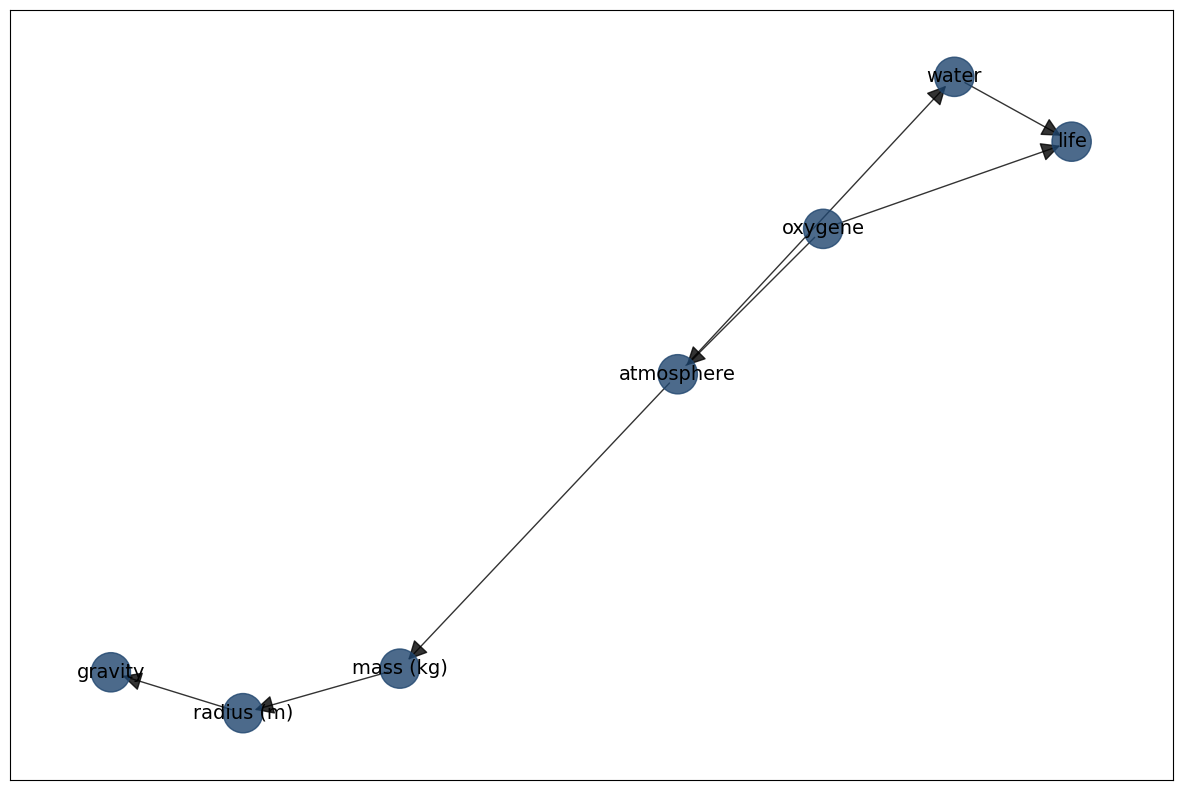

In [23]:
bn.plot(DAG)

Consideramos que esta red no es verosímil debido a que algunas variables no las considera influyentes, lo cual no coincide con nuestro criterio.

Por tanto, hemos modificado la red bayesiana de la siguiente manera.

In [24]:
DAG['adjmat']['radius (m)']= False
DAG['adjmat']['mass (kg)']= [True, False, False, False, False, False, False, False, False]
DAG['adjmat']['gravity']= [True, True, False, False, False, False, False, False, False]
DAG['adjmat']['atmosphere']= [False, True, False, False, False, False, False, False, False]
DAG['adjmat']['oxygene']= [False, False, False, True, False, False, False, False, False]
DAG['adjmat']['avg_temp (C)']= [False, False, False, True, False, False, False, True, False]
DAG['adjmat']['water']= [False, False, False, True, False, True, False, False, False]
DAG['adjmat']['rotational_period (h)']= [False, True, False, False, False, False, False, False, False]
DAG['adjmat']['life']= [False, False, False, False, True, False, True, False, False]

print(DAG['adjmat'])

target                 radius (m)  mass (kg)  gravity  atmosphere  oxygene  \
source                                                                       
radius (m)                  False       True     True       False    False   
mass (kg)                   False      False     True        True    False   
gravity                     False      False    False       False    False   
atmosphere                  False      False    False       False     True   
oxygene                     False      False    False       False    False   
avg_temp (C)                False      False    False       False    False   
water                       False      False    False       False    False   
rotational_period (h)       False      False    False       False    False   
life                        False      False    False       False    False   

target                 avg_temp (C)  water  rotational_period (h)   life  
source                                                            

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'radius (m)': array([0.67938661, 0.52763061]),
  'mass (kg)': array([0.34070243, 0.1376547 ]),
  'gravity': array([1.        , 0.91122119]),
  'atmosphere': array([-0.33214883, -0.19580326]),
  'oxygene': array([-0.47821906,  0.07559747]),
  'avg_temp (C)': array([-0.22590728, -0.47068277]),
  'water': array([-0.45407975, -0.2975081 ]),
  'rotational_period (h)': array([ 0.09611289, -0.57822745]),
  'life': array([-0.625847 , -0.1098824])},
 'G': <networkx.classes.digraph.DiGraph at 0x196b4fbe9e0>,
 'node_properties': {'radius (m)': {'node_color': '#1f456e', 'node_size': 800},
  'mass (kg)': {'node_color': '#1f456e', 'node_size': 800},
  'gravity': {'node_color': '#1f456e', 'node_size': 800},
  'atmosphere': {'node_color': '#1f456e', 'node_size': 800},
  'oxygene': {'node_color': '#1f456e', 'node_size': 800},
  'avg_temp (C)': {'node_color': '#1f456e', 'node_size': 800},
  'water': {'node_color': '#1f456e', 'node_size': 800},
  'rota

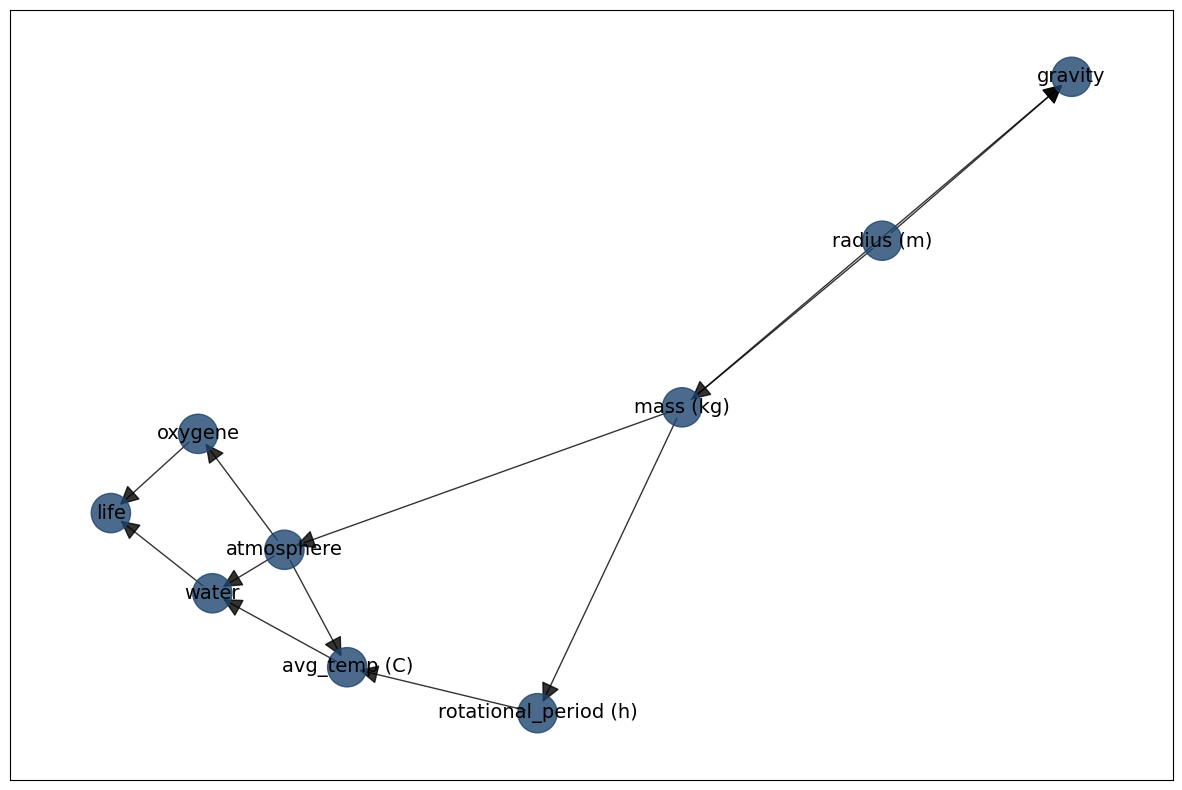

In [25]:
bn.plot(DAG)

Además, también hemos desarrollado nuestra red de manera manual con las dependencias según nuestro criterio.

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of radius (m):
+---------------+----------+
| radius (m)(B) | 0.340036 |
+---------------+----------+
| radius (m)(M) | 0.330611 |
+---------------+----------+
| radius (m)(S) | 0.329354 |
+---------------+----------+
[bnlearn] >CPD of gravity:
+------------+----------------------+-----+--------------------+---------------+
| mass (kg)  | mass (kg)(B)         | ... | mass (kg)(S)       | mass (kg)(S)  |
+------------+----------------------+-----+--------------------+---------------+
| radius (m) | radius (m)(B)        | ... | radius (m)(M)      | radius (m)(S) |
+------------+----------------------+-----+--------------------+---------------+
| gravity(B) | 0.9953803510933169   | ... | 0.3333333333333333 | 0.0           |
+------------+----------------------+-----

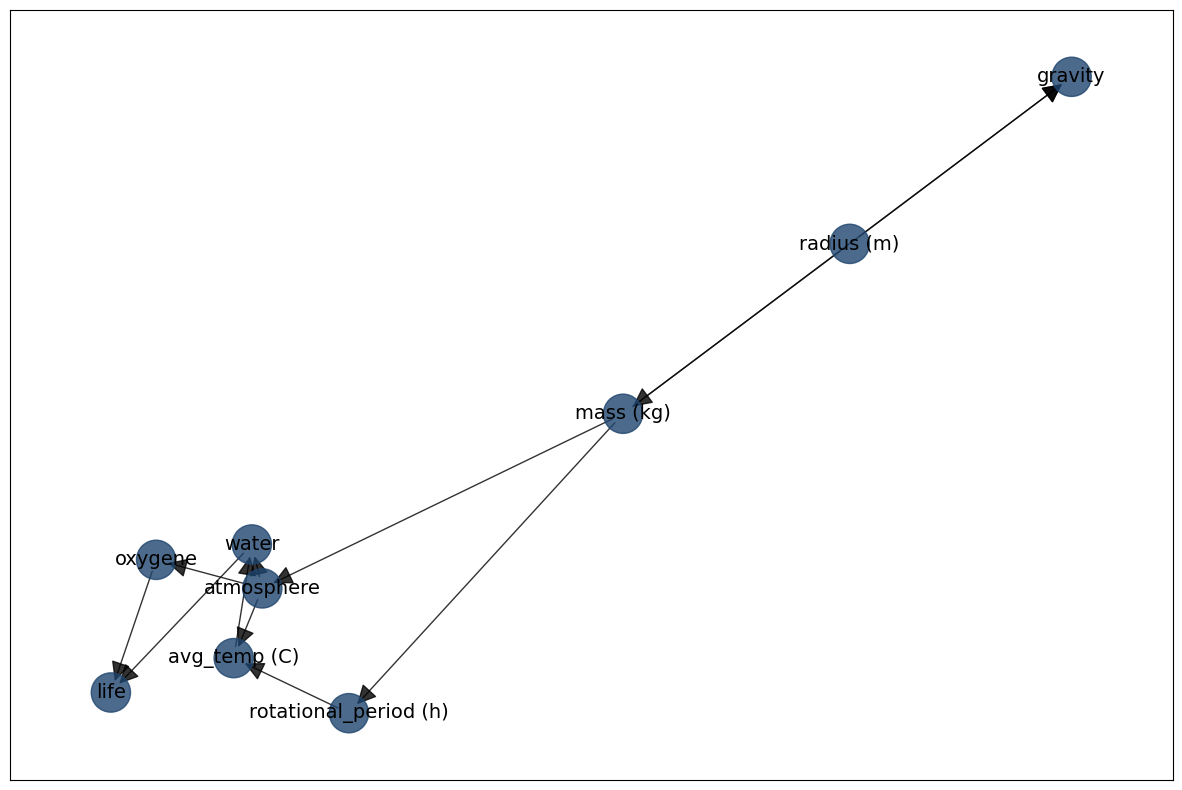

In [26]:
edges = [('radius (m)', 'gravity'),
         ('radius (m)', 'mass (kg)'),
         ('mass (kg)', 'gravity'),
         ('mass (kg)', 'atmosphere'),
         ('mass (kg)', 'rotational_period (h)'),
         ('rotational_period (h)', 'avg_temp (C)'),
         ('atmosphere', 'avg_temp (C)'),
         ('avg_temp (C)', 'water'),
         ('atmosphere', 'water'),
         ('atmosphere', 'oxygene'),
         ('water', 'life'),
         ('oxygene', 'life')]

DAG_veros = bn.make_DAG(edges)

bn.plot(DAG_veros)
model = bn.parameter_learning.fit(DAG_veros, df, methodtype='maximumlikelihood')

### 3. Busca de manera automática las tablas de probabilidad condicionada de la red.

Para la resolución de este apartado hemos hecho uso de la función "parameter_learning.fit" de la librería bnlearn. Le hemos tenido que pasar la red generad automáticamente ya esta tiene unos parámetros necesarios para el cálculo de las tablas.

In [27]:
model = bn.parameter_learning.fit(DAG_veros, df, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of radius (m):
+---------------+----------+
| radius (m)(B) | 0.340036 |
+---------------+----------+
| radius (m)(M) | 0.330611 |
+---------------+----------+
| radius (m)(S) | 0.329354 |
+---------------+----------+
[bnlearn] >CPD of gravity:
+------------+----------------------+-----+--------------------+---------------+
| mass (kg)  | mass (kg)(B)         | ... | mass (kg)(S)       | mass (kg)(S)  |
+------------+----------------------+-----+--------------------+---------------+
| radius (m) | radius (m)(B)        | ... | radius (m)(M)      | radius (m)(S) |
+------------+----------------------+-----+--------------------+---------------+
| gravity(B) | 0.9953803510933169   | ... | 0.3333333333333333 | 0.0           |
+------------+----------------------+-----+--------------------+---------------+
| gravity(M) | 0.004619648906683092 | ... | 0.3333333333333333 | 0.0           |
+------------+

### 4. Escoge algunas propiedades de los planetas y realiza la inferencia sobre ellos.

Hemos escogido las siguientes propiedades de los planetas para realizar las inferencias sobre ellas.

- Probabilidad de que haya o no vida si hay agua y no hay oxígeno.

In [28]:
q1 = bn.inference.fit(model, variables=['life'], evidence={'water':'YES', 'oxygene':'NO'})
print(q1.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+----------+
|    |   life |        p |
+====+========+==========+
|  0 |      0 | 0.486014 |
+----+--------+----------+
|  1 |      1 | 0.513986 |
+----+--------+----------+
   life         p
0     0  0.486014
1     1  0.513986


- Probabilidad de que haya o no vida si hay agua y hay oxígeno.

In [29]:
q2 = bn.inference.fit(model, variables=['life'], evidence={'water':'YES', 'oxygene':'YES'})
print(q2.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+----------+
|    |   life |        p |
+====+========+==========+
|  0 |      0 | 0.192804 |
+----+--------+----------+
|  1 |      1 | 0.807196 |
+----+--------+----------+
   life         p
0     0  0.192804
1     1  0.807196


- Probabilidad de que haya o no vida si hay oxígeno, no hay agua y la temperatura es media.

In [30]:
q3 = bn.inference.fit(model, variables=['life'], evidence={'oxygene':'YES', 'water':'NO', 'avg_temp (C)': 'M'})
print(q3.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+-----------+
|    |   life |         p |
+====+========+===========+
|  0 |      0 | 0.910813  |
+----+--------+-----------+
|  1 |      1 | 0.0891871 |
+----+--------+-----------+
   life         p
0     0  0.910813
1     1  0.089187


- Probabilidad de que haya o no agua si el radio es grande y hay atmósfera.

In [31]:
q4 = bn.inference.fit(model, variables=['water'], evidence={'radius (m)':'B', 'atmosphere':'YES'})
print(q4.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   water |        p |
+====+=========+==========+
|  0 |       0 | 0.700725 |
+----+---------+----------+
|  1 |       1 | 0.299275 |
+----+---------+----------+
   water         p
0      0  0.700725
1      1  0.299275


- Probabilidad de que haya o no vida si hay oxígeno, hay agua, hay atmósfera, la gravedad es baja, el radio, la masa, el periodo de rotación y la temperatura media están en la media.

In [32]:
q6 = bn.inference.fit(model, variables=['life'], evidence={'oxygene':'YES', 'water':'YES', 'atmosphere': 'YES', 'gravity': 'S',
                                                          'radius (m)': 'M', 'mass (kg)': 'M', 'rotational_period (h)': 'M', 
                                                          'avg_temp (C)': 'M'})
print(q6.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+----------+
|    |   life |        p |
+====+========+==========+
|  0 |      0 | 0.192804 |
+----+--------+----------+
|  1 |      1 | 0.807196 |
+----+--------+----------+
   life         p
0     0  0.192804
1     1  0.807196


Como se puede observar arriba, los resultados obtenidos son probabilidades acertadas.